In [258]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

In [259]:
def polypow3(co):
    '''input has to be tuple or list containing all coeffs L[0] = x³ to L[3] = x^0'''
    
    F = lambda x: co[0]*x**3 + co[1]*x**2 + co[2]*x + co[3]
    f = lambda x: 3*co[0]*x**2 + 2*co[1]*x + co[2]
    df1 = lambda x: 6*co[0]*x +2*co[1]

    x = np.linspace(-5, 10, 100)

    fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4),sharey = True)
    
    axs[0].plot(x, F(x), c = 'black')
    axs[1].plot(x, f(x), c = 'black')
    axs[2].plot(x, df1(x),c ='black')
    axs[0].set_title("F(x) = {}x³+{}x²+{}x+{}".format(co[0],co[1],co[2],co[3]))
    axs[1].set_title("f(x) = {}x²+{}x+{}".format(3*co[0],2*co[1],co[2]))
    axs[2].set_title("df1(x) = {}x+{}".format(6*co[0],2*co[1]))

    for n in range(3):
        axs[n].set_facecolor('0.13')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
    plt.show()

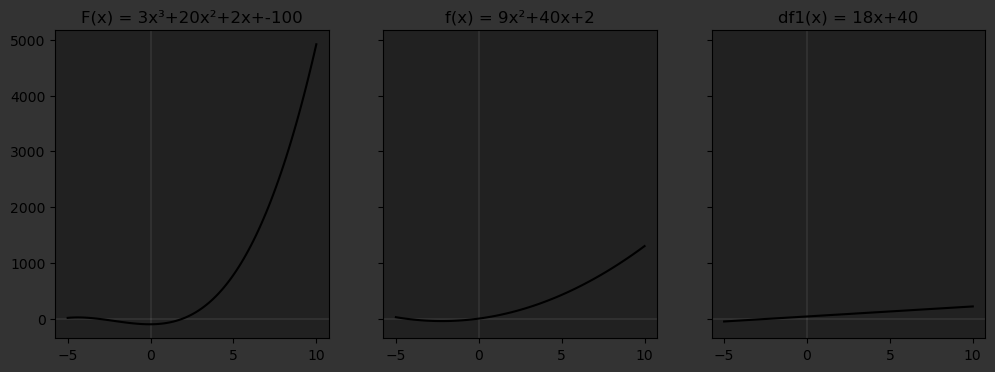

In [260]:
polypow3([3,20,2,-100])

In [284]:
#i haven't calculated for any values, but this should be correct
def polypown(co):
    '''given a list of coeffs in ascending order L[0] = x^0 until L[n] = x^n
       this function will draw the graphes for the Function and the first two derivatives.'''

    def create_polynomial(coeffs):
        n = len(coeffs) 
        sym_expr = 0
        for i in range(n):
            sym_expr += coeffs[i]*x**i
        return sym_expr
    
    x = sp.symbols('x')
    F = create_polynomial(co)
    f = sp.diff(F, x)
    df = sp.diff(sp.diff(F, x), x)
    F1 = sp.lambdify(x, F, 'numpy')
    f1 = sp.lambdify(x, f, 'numpy')
    df1 = sp.lambdify(x, df, 'numpy')
    x_ = np.linspace(-10, 10, 100)

    fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4))#,sharey = True)
    
    axs[0].plot(x_, F1(x_), c = 'green')
    if len(co) == 3:
        axs[2].axhline(y=2*co[2],c='green')
        axs[1].plot(x_, f1(x_), c = 'green')
    elif len(co) == 2:
        axs[1].axhline(y=co[1],c='green')
    else:
        axs[1].plot(x_, f1(x_), c = 'green')
        axs[2].plot(x_, df1(x_),c ='green')
    axs[0].set_title("F(x) = {}".format(F), fontsize=9)
    axs[1].set_title("f(x) = {}".format(f), fontsize=9)
    axs[2].set_title("df1(x) = {}".format(df), fontsize=9)

    for n in range(3):
        axs[n].set_facecolor('black')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
    plt.show()

In [285]:
class Calculus:
    def __init__(self,L):
        self.x = sp.symbols('x')
        def create_symfunc(coeffs):
            n = len(coeffs) 
            sym_expr = 0
            for i in range(n):
                sym_expr += coeffs[i]*self.x**i
            return sym_expr        
        self.sym_func = create_symfunc(L)
        self.sym_dfunc = sp.diff(self.sym_func, self.x)
        self.sym_ifunc = sp.integrate(self.sym_func, self.x)
        self.func = sp.lambdify(self.x, self.sym_func, 'numpy')
        self.dfunc = sp.lambdify(self.x, self.sym_dfunc, 'numpy')
        self.ifunc = sp.lambdify(self.x, self.sym_ifunc, 'numpy')
    
    def show_func(self):
        return self.sym_func
    
    def calcx(self,v):
        return self.func(v)
    
    def value_table(self, start=-5, stop=5, step=1):
        d = pd.Series({round(k, 6): round(self.func(k), 7) for k in np.arange(start, stop, step)})
        return d  
    
    def value_table2(self, start=-5, stop=5, step=1):
        f = {round(k, 6): round(self.func(k), 7) for k in np.arange(start, stop, step)}
        d1 = {round(k, 6): round(self.dfunc(k), 7) for k in np.arange(start, stop, step)}
        i = {round(k, 6): round(self.ifunc(k), 7) for k in np.arange(start, stop, step)}
        df = pd.DataFrame({'{}'.format(self.sym_ifunc): i,'{}'.format(self.sym_func): f, '{}'.format(self.sym_dfunc): d1})
        return df
    
    def integrate(self,transform=False):
        if transform:
            self.a = sp.Poly(sp.integrate(self.sym_func, self.x)).coeffs()
            self.a.append(0)
            return Calculus(self.a[::-1])
        else:
            return sp.integrate(self.sym_func, self.x)
        
    def derivative(self,transform=False):
        if transform:
            self.a = sp.Poly(sp.diff(self.sym_func, self.x)).coeffs()
            return Calculus(self.a[::-1])
        else:
            return sp.diff(self.sym_func, self.x)
    
    def show_curve(self, coords=[-8,8,-100,100]): #yes I really added markers to my lines lol
        xticks = list(range(coords[0]-1,coords[1]+1, 1))
        yticks = list(range(coords[2]-1,coords[3]+1, 1))
        y_ticks = len(xticks)
        x_ticks = len(yticks)
        x_ = np.linspace(coords[0], coords[1], 100)
        plt.figure(facecolor='0.3',figsize=(6,5))
        plt.axes().set_facecolor('grey')
        plt.axis([coords[0],coords[1],coords[2],coords[3]])
        plt.plot(x_, self.func(x_),color='black')
        plt.axhline(y=0, color='k', lw=0.5,zorder=2)
        plt.axvline(x=0, color='k', lw=0.5,zorder=2)
        plt.scatter(xticks,np.zeros(y_ticks),color = 'black',zorder=2,marker='.', s=4)
        plt.scatter(np.zeros(x_ticks), yticks,color = 'black',zorder=2,marker='.', s=4)
        plt.grid()
        plt.show()

In [286]:
f_ = Calculus([0,0,3])
f_.show_func()

3*x**2

In [287]:
f_.integrate()

x**3

In [288]:
valuetable = f_.value_table(-2,2,0.5)
valuetable.std()

4.107919181288746

In [289]:
f_.value_table2()

,x**3,3*x**2,6*x
-5,-125,75,-30
-4,-64,48,-24
-3,-27,27,-18
-2,-8,12,-12
-1,-1,3,-6
0,0,0,0
1,1,3,6
2,8,12,12
3,27,27,18
4,64,48,24


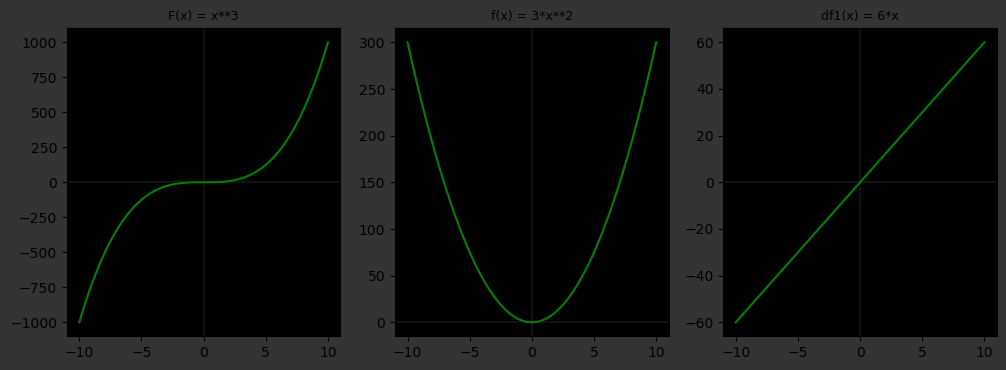

In [290]:
polypown([0,0,0,1])

In [291]:
f_.value_table()

-5    75
-4    48
-3    27
-2    12
-1     3
 0     0
 1     3
 2    12
 3    27
 4    48
dtype: int32

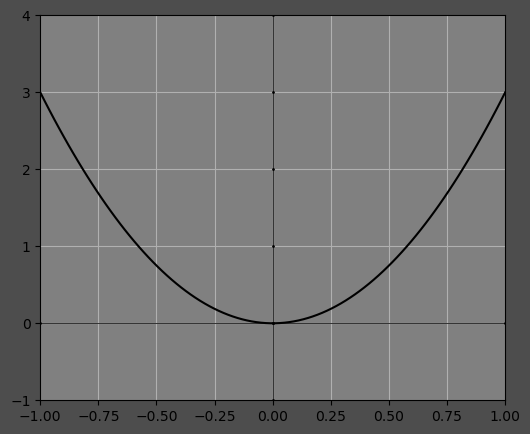

In [292]:
f_.show_curve([-1, 1, -1, 4])